In [1]:
# ===============================================
# Projeto: Redução de dimensionalidade em imagens
# Conversão para tons de cinza e binarização
# Implementação do zero (sem bibliotecas prontas de conversão)
# ===============================================

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
# ----------- Função para converter RGB para tons de cinza -----------
def rgb_para_cinza(img_rgb):
    """
    Converte imagem RGB para tons de cinza.
    Fórmula: Gray = 0.299*R + 0.587*G + 0.114*B
    """
    altura, largura, _ = img_rgb.shape
    img_cinza = np.zeros((altura, largura), dtype=np.uint8)

    for i in range(altura):
        for j in range(largura):
            r, g, b = img_rgb[i, j]
            # Conversão para escala de cinza
            gray = 0.299*r + 0.587*g + 0.114*b
            img_cinza[i, j] = int(gray)

    return img_cinza

In [4]:
# ----------- Função para binarização -----------
def binarizar(img_cinza, limiar=128):
    """
    Converte imagem em tons de cinza para imagem binária (preto e branco).
    Pixels acima do limiar ficam brancos (255), abaixo ficam pretos (0).
    """
    altura, largura = img_cinza.shape
    img_binaria = np.zeros((altura, largura), dtype=np.uint8)

    for i in range(altura):
        for j in range(largura):
            if img_cinza[i, j] >= limiar:
                img_binaria[i, j] = 255
            else:
                img_binaria[i, j] = 0

    return img_binaria

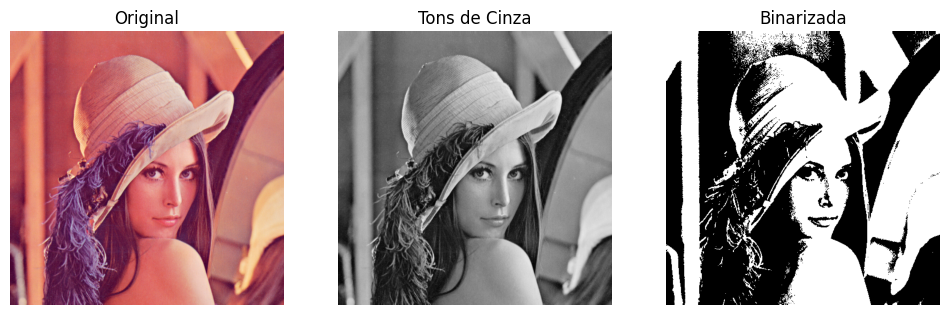

In [6]:
# ----------- Execução no Google Colab -----------

# Carregar imagem (substitua o caminho pelo seu arquivo no Colab)
# Exemplo: faça upload com o botão do Colab e use o nome do arquivo
# img = imread('Lenna.jpg')  # coloque a imagem na mesma pasta
img = imread('Lenna.png')  # coloque a imagem na mesma pasta

# Caso a imagem esteja normalizada (0 a 1), escalar para 0 a 255
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Converter para tons de cinza
img_cinza = rgb_para_cinza(img)

# Converter para binário
img_binaria = binarizar(img_cinza, limiar=128)

# Exibir resultados
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Tons de Cinza")
plt.imshow(img_cinza, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Binarizada")
plt.imshow(img_binaria, cmap='gray')
plt.axis('off')

plt.show()
